# Visualizing Data to Share Insights
Sharing your insights is a key step in the data science process. The ability to clearly and accurately communicate your findings is crucial! This step bridges the gap between analyzing data and helping drive better decision making and business value. Our efforts of loading, cleaning, transforming, and analyzing data will be far less impactful if we cannot effectively communicate the key messages.

We will focus on three of the most common data visualizations:
* line charts to show trends
* bar plots to show aggregations by category
* scatter plots to show relationships between variables

As we go through each visual, we will take a deeper look at some of the main formatting parameters available to us. This will allow us to further control the exact look of each visual.

Let's start by importing the packages that we need and creating our `stocksAndBonds` DataFrame again. This time, for the first part of this notebook, we will keep the `Adj Close` as the original value.

In [3]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
%matplotlib inline

In [5]:
# Create the stocksAndBonds DataFrame
startdate = '2021-01-01'
enddate = '2022-12-31'

stocks = pdr.DataReader('SPY','yahoo', startdate, enddate)[['Adj Close']]
bonds = pdr.DataReader('TLT','yahoo', startdate, enddate)[['Adj Close']]
oil = pdr.DataReader('USO','yahoo', startdate, enddate)[['Adj Close']]

stocksAndBonds = pd.concat([stocks, bonds, oil], axis=1, join='inner')

stocksAndBonds.columns = ['SPY','TLT','USO']

stocksAndBonds.head()

,SPY,TLT,USO
Date,,,
2021-01-04,359.773224,152.307343,32.380001
2021-01-05,362.251099,151.176208,33.939999
2021-01-06,364.416870,148.072815,34.110001
2021-01-07,369.831177,146.767670,34.529999
2021-01-08,371.938416,146.293930,35.430000


# Creating Line Charts
For our first example, we can create a line chart to show the trend in the value of 'SPY' over time. We can create two Series for our visual: years and revenue. 

We'll use the plot function from matplotlib. This will draw a line from point to point in our data. The values in x will be shown on the horizontal axis and the values in y will be shown on the vertical axis.

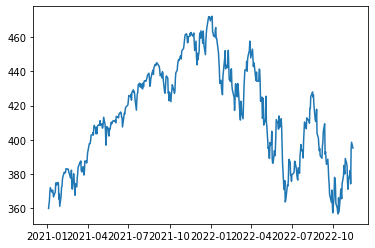

In [6]:
# Create years and stock_value to populate the line chart
years = stocksAndBonds.index
stock_value = stocksAndBonds['SPY']
plt.plot(years, stock_value)

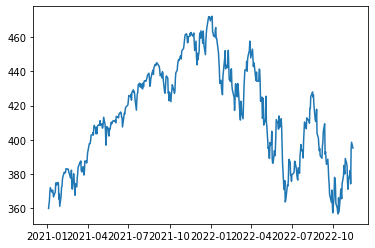

In [7]:
# Add semicolon to hide matplotlib text output
years = stocksAndBonds.index
stock_value = stocksAndBonds['SPY']
plt.plot(years, stock_value);

# Formatting Line Charts


We've created a simple chart using pyplot in Python. Now, let's look at how to format the plot. We'll use the same example as above and create a plot using x and y. We'll use the `title` function to add a title to the plot, use the `xlabel` function to label the x axis, and use the `ylabel` function to add a label for the y axis. We can also use the `xticks` function to change the appearance of the labels on the x axis.

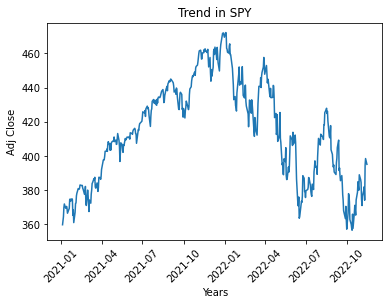

In [10]:
plt.plot(years, stock_value)

# Add titles and labels
plt.title('Trend in SPY')
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.xticks(rotation = 45);

Next, we can control the size of the plot by using the `figure` function and the `figsize` parameter. We can use this to make the size of our plot bigger and easier to read. The default values for figsize are 6.4 and 4.8, so we can increase these values to increase the size of our chart. We can also change the color of the line chart by using the `color` parameter in the plot function.

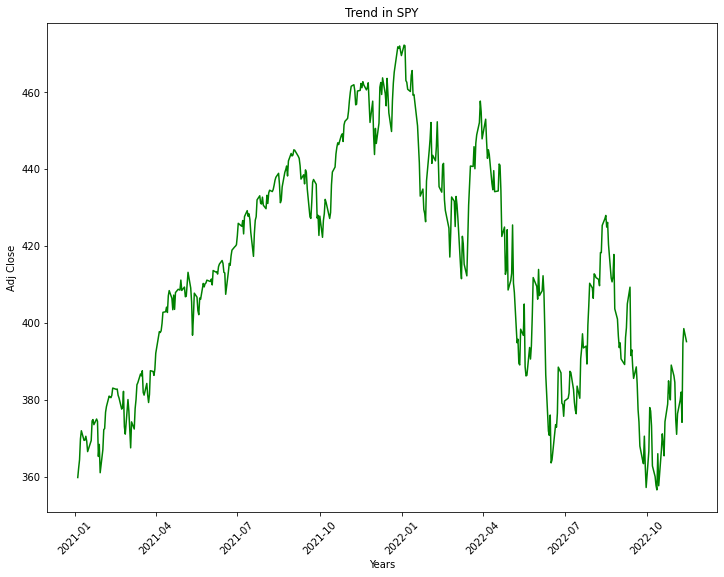

In [14]:
# Set size of plot
plt.figure(figsize = (12,9))

           
# Change line color
plt.plot(years, stock_value, color='green')

# Add titles and labels
plt.title('Trend in SPY')
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.xticks(rotation = 45);

We can further customize the look of our line chart by updating the `marker`, `markersize`, and `linestyle` parameters inside the plot function. We will add a circle marker to each data point in the line, set the size of this marker, and change the line from solid to dashed.

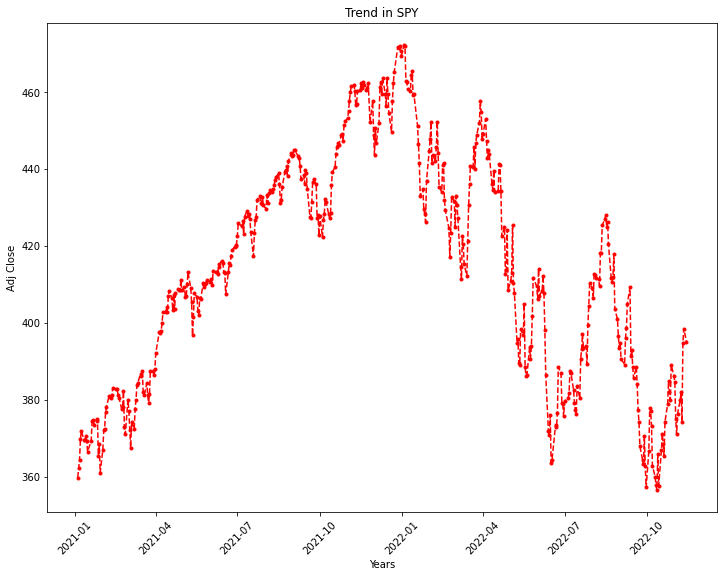

In [17]:
# Set size of plot
plt.figure(figsize = (12,9))

           
# Change line color
plt.plot(years, stock_value, color='red', marker = 'o', markersize = 3, linestyle = '--')

# Add titles and labels
plt.title('Trend in SPY')
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.xticks(rotation = 45);

In an earlier plot, we updated the `figsize` of our visual. However, in each of the examples so far, the x and y axis have remained the same. They have been generated automatically for us, based on the values in our data set. We have the ability to control the limits of the chart using the `xlim` and `ylim` functions.

Let's update the y-axis to span between 340 and 500. We can see that the shape of the line stays the same, but the minimum and maximum value of the axis changed.

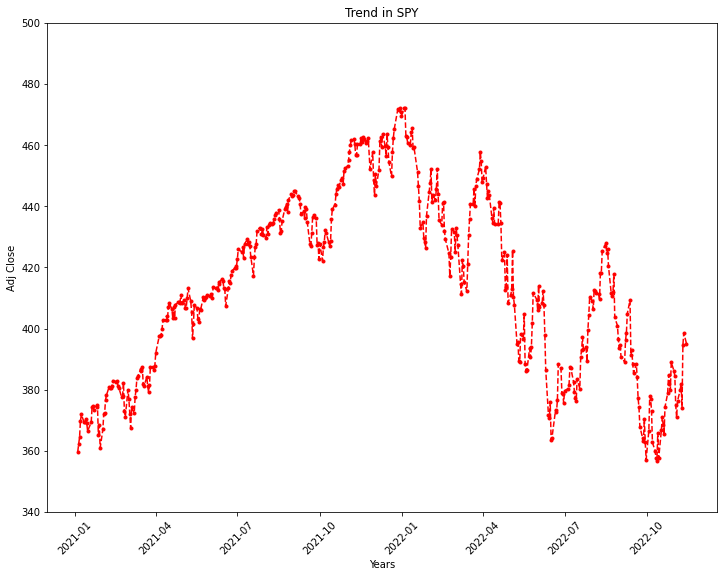

In [18]:
# Set size of plot
plt.figure(figsize = (12,9))

           
# Change line color
plt.plot(years, stock_value, color='red', marker = 'o', markersize = 3, linestyle = '--')

# Add titles and labels
plt.title('Trend in SPY')
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.xticks(rotation = 45)

# Add limits to the axes
plt.ylim(340,500);

# Creating Bar Plots
Bar plots allow us to visualize a comparison between different categories or columns in our data set. Typically, we would aggregate multiple values within a category and compare these aggregates across categories. In our example, we can calculate the mean value for each of our three stocks.

Let's start by calculating the mean.

In [20]:
# Calculate the mean Adj Close for each stock in stocksAndBonds
stock_mean = stocksAndBonds.mean()
stock_mean

SPY    413.734621
TLT    130.377282
USO     59.370955
dtype: float64

In [21]:
# Convert stock_mean into a DataFrame: bar_plot
bar_plot = pd.DataFrame(data= stock_mean, columns = ['Mean Value'])

<AxesSubplot:ylabel='Mean Value'>

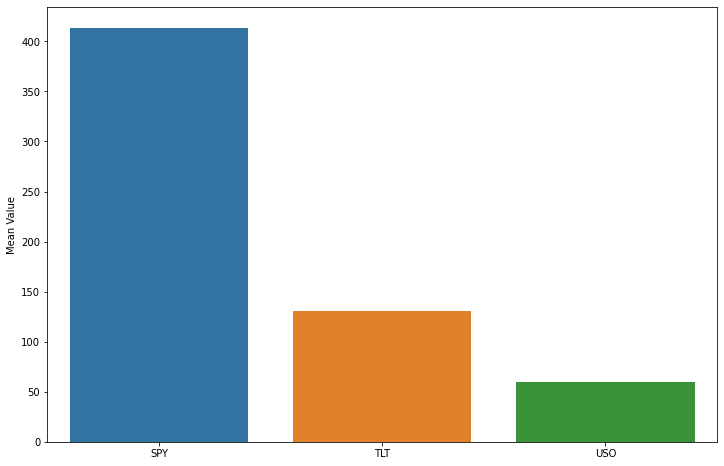

In [24]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create bar plot to compare the means of our stocks
sns.barplot(x= bar_plot.index, y = 'Mean Value', data= bar_plot)

# Formatting Bar Plots
We've created a standard bar plot using the seaborn `barplot()` function. To start to change the appearance of bar plot, we can change some parameters from their default setting and add some other functions as well.

The first parameter that we can update is `palette`. This changes the color of the bars in the bar plot. There are lots of built-in options to choose from. A list of palettes from the Seaborn documentation can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html. In our example, we can look at the `coolwarm` palette that we used for our correlation matrix heatmap. We can also use the `colorblind` palette, which ensures that our visuals are accessible to all users.

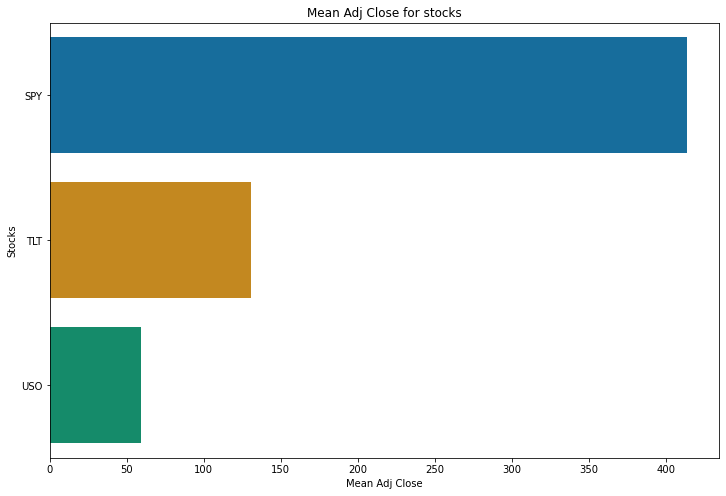

In [30]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create bar plot with 'coolwarm' palette
sns.barplot(y=bar_plot.index, x='Mean Value', data=bar_plot, palette ='colorblind')

# Add titles and labels
plt.title('Mean Adj Close for stocks')
plt.ylabel('Stocks')
plt.xlabel('Mean Adj Close');

Another formatting option we have with bar plots is to change the orientation. Rather than the category on the x axis and the value on the y axis for a vertical plot, we can switch the two parameters to have a horizontal bar plot. When we change these two arguments, we need to remember to update the labels as well!

Text(300, 0.5, 'SPY has the highest mean value')

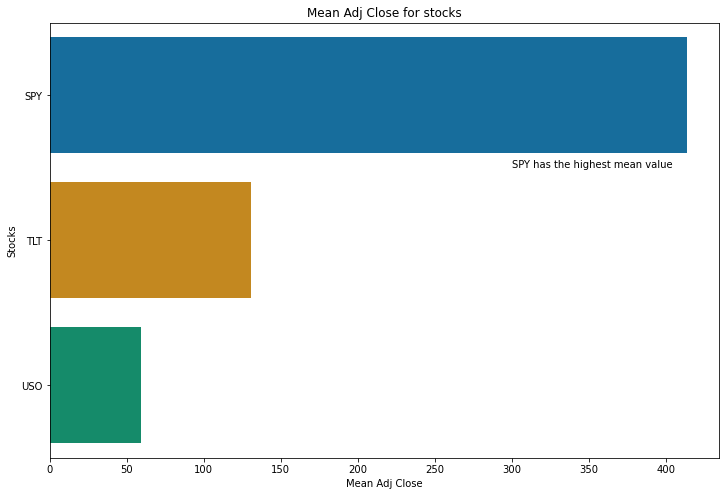

In [31]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create bar plot with 'coolwarm' palette
sns.barplot(y=bar_plot.index, x='Mean Value', data=bar_plot, palette ='colorblind')

# Add titles and labels
plt.title('Mean Adj Close for stocks')
plt.ylabel('Stocks')
plt.xlabel('Mean Adj Close')

plt.annotate('SPY has the highest mean value', xy= (300,0.5))

A further function we can use to enhance our visuals is `annotate()`. This matplotlib function allows us to define the text and location in our plot to add a descriptive annotation. We can use this to highlight a key insight, or further explain what is happening in our visual.

# Creating Scatter Plots
In this lesson, we'll demonstrate how to create a scatter plot using `scatterplot()` from Seaborn. Scatter plots are commonly used to show the relationship between two variables, or two sets of data.

It might be challenging to compare the stocks with our current data set. To make the comparison easier, let's convert the adjusted close to a percent change again. This way, we can compare the day over day percent change of the stocks, instead of the values.

To do this, let's create a new DataFrame: `stocksAndBonds_pct`.

In [36]:
stocks_pct = stocks.pct_change()
bonds_pct = bonds.pct_change()
oil_pct = oil.pct_change()

stocksAndBonds_pct =pd.concat([stocks_pct, bonds_pct, oil_pct], axis=1,join='inner')
stocksAndBonds_pct.columns = ['SPY', 'TLT', 'USO']

stocksAndBonds_pct.head()

,SPY,TLT,USO
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,0.006887,-0.007427,0.048178
2021-01-06,0.005979,-0.020528,0.005009
2021-01-07,0.014857,-0.008814,0.012313
2021-01-08,0.005698,-0.003228,0.026064


To assign the x axis and y axis, we need to reference a column in the `stocksAndBonds_pct` DataFrame. We want the values in 'SPY' column to be on the x axis, and the values in the 'TLT' column to be on the y axis.

<AxesSubplot:xlabel='SPY', ylabel='TLT'>

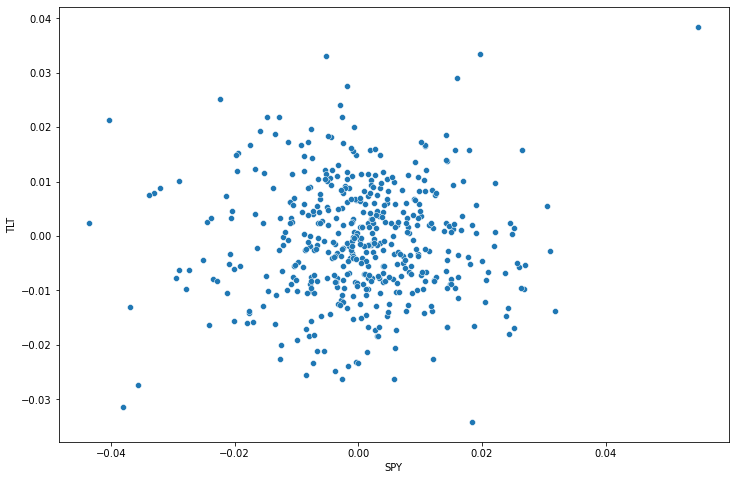

In [40]:
# Set plot size
plt.figure(figsize=(12, 8))

# Scatter plot with seaborn.scatterplot()
sns.scatterplot(x=stocksAndBonds_pct['SPY'],y=stocksAndBonds_pct['TLT'])

# Formatting Scatter Plots
Three common formatting options used in scatter plots are:
* style
* hue
* size

We typically use an additional column in the data set to populate these arguments. To help better illustrate this, let's update the `stocksAndBonds_pct` DataFrame. We'll add an additional column that contains the year from the date of the percent change for each stock.

In [42]:
stocksAndBonds_pct['Year'] = stocksAndBonds_pct.index.year
stocksAndBonds_pct.head()

,SPY,TLT,USO,Year
Date,,,,
2021-01-04,NaN,NaN,NaN,2021
2021-01-05,0.006887,-0.007427,0.048178,2021
2021-01-06,0.005979,-0.020528,0.005009,2021
2021-01-07,0.014857,-0.008814,0.012313,2021
2021-01-08,0.005698,-0.003228,0.026064,2021


The `style` parameter can be used to control the appearance of each marker in the scatter plot. Let's add the new `Year` column to the style parameter. The data points will change shape, depending on which year the observation was made.

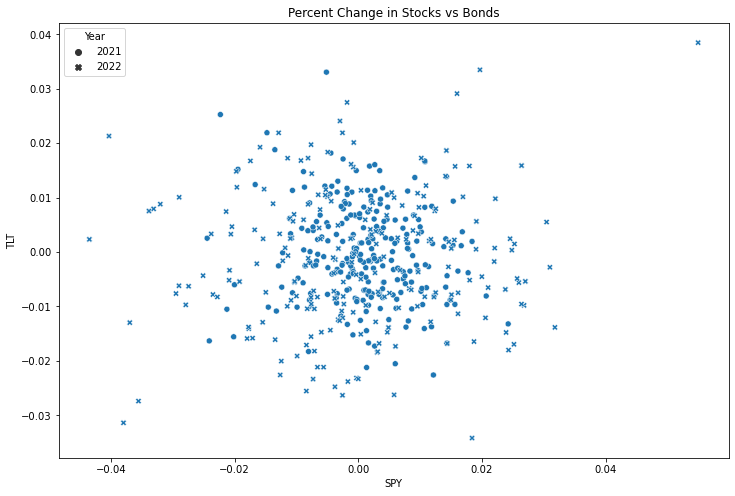

In [44]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create scatter plot with style parameter
sns.scatterplot(x='SPY', y='TLT', data=stocksAndBonds_pct, style='Year')

# Add titles and labels
plt.title('Percent Change in Stocks vs Bonds');

The `hue` parameter can be used to control the color of each data point in the plot. If we add `Year` to this parameter, the data points are light red if they are from 2021 and a darker color if they are from 2022.

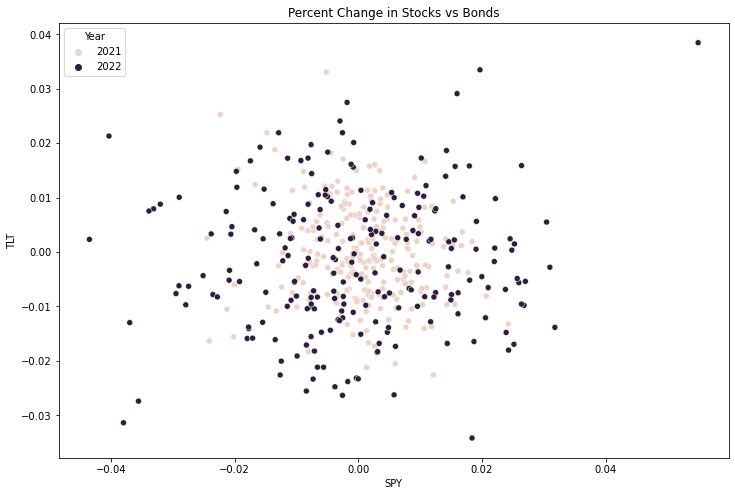

In [45]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create scatter plot with style parameter
sns.scatterplot(x='SPY', y='TLT', data=stocksAndBonds_pct, hue='Year')

# Add titles and labels
plt.title('Percent Change in Stocks vs Bonds');

Finally, we have the `size` parameter. This controls the size of each data point in the scatter plot. We can use the `Year` column again in this argument. Data points from 2022 will appear larger than data points from 2021.

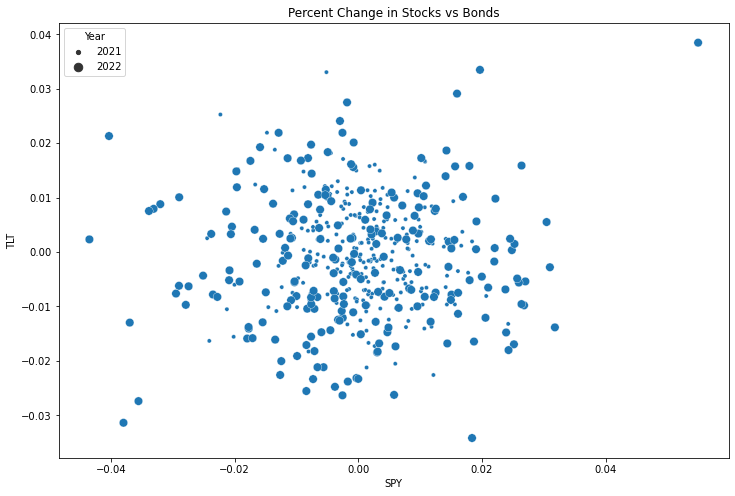

In [46]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create scatter plot with style parameter
sns.scatterplot(x='SPY', y='TLT', data=stocksAndBonds_pct, size='Year')

# Add titles and labels
plt.title('Percent Change in Stocks vs Bonds');

We can combine these parameters together within a single plot. So far, we have used the `Year` column to demonstrate each of our parameters. It consists of only two values. But we can also use a continuous column for these parameters as well. We can use the `USO` column from our DataFrame. A continuous column will not make sense for the `style` argument, as we do not want a lot of different shapes in our visual. But let's update `hue` and `size` with this continuous column.

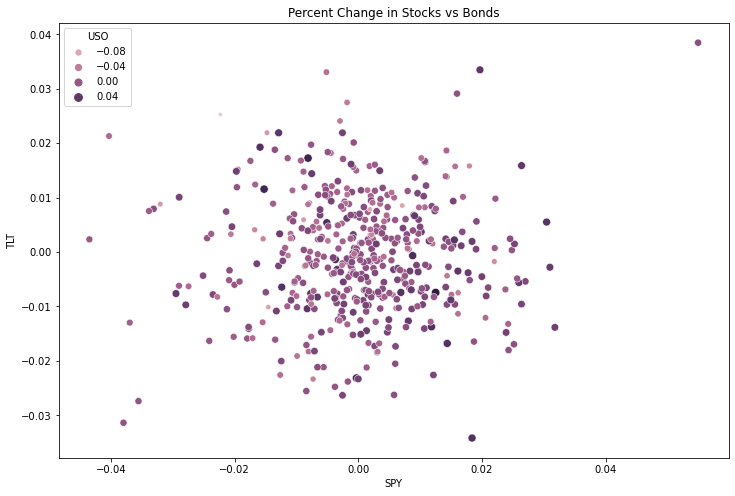

In [47]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create scatter plot with style parameter
sns.scatterplot(x='SPY', y='TLT', data=stocksAndBonds_pct, hue='USO', size='USO')

# Add titles and labels
plt.title('Percent Change in Stocks vs Bonds');